In [2]:
import pandas as pd


df = pd.read_csv("WA_Marketing-Campaign.csv")

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


(None,
    MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
 0         1     Medium           1           4          3     1   
 1         1     Medium           1           4          3     2   
 2         1     Medium           1           4          3     3   
 3         1     Medium           1           4          3     4   
 4         1     Medium           2           5          2     1   
 
    SalesInThousands  
 0             33.73  
 1             35.67  
 2             29.03  
 3             39.25  
 4             27.81  )

## No Missing Values – The dataset is complete. 

## Data Structure – There are 548 records, covering different stores, markets, and promotions over 4 weeks.



In [7]:
# Summary statistics for numerical columns
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


C:\Users\dilip\AppData\Local\Temp\ipykernel_24540\3485217802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Promotion", y="SalesInThousands", data=df, palette="pastel")


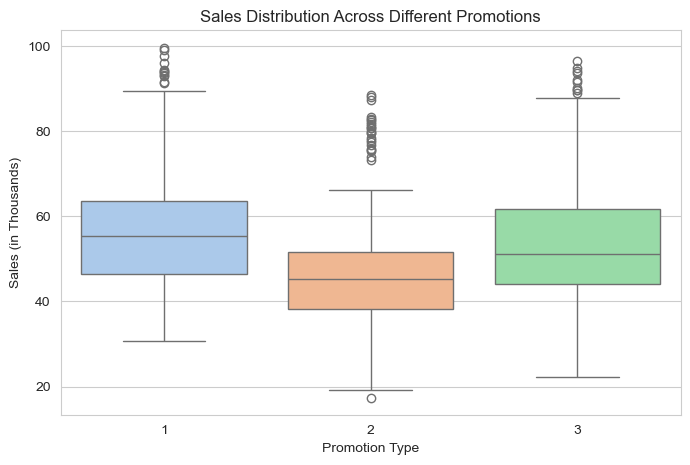

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# Boxplot: Sales distribution per promotion
plt.figure(figsize=(8, 5))
sns.boxplot(x="Promotion", y="SalesInThousands", data=df, palette="pastel")

plt.title("Sales Distribution Across Different Promotions")
plt.xlabel("Promotion Type")
plt.ylabel("Sales (in Thousands)")
plt.show()

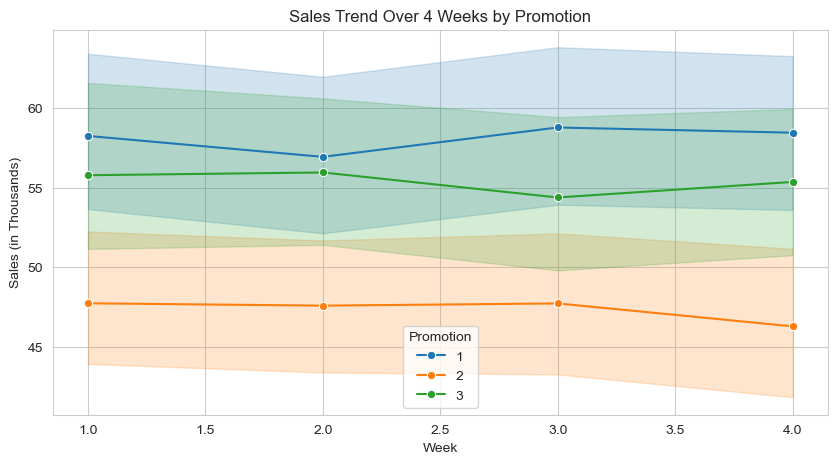

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# Line plot: Sales trends over 4 weeks for each promotion
plt.figure(figsize=(10, 5))
sns.lineplot(x="week", y="SalesInThousands", hue="Promotion", data=df, marker="o", palette="tab10")

plt.title("Sales Trend Over 4 Weeks by Promotion")
plt.xlabel("Week")
plt.ylabel("Sales (in Thousands)")
plt.legend(title="Promotion")
plt.show()


C:\Users\dilip\AppData\Local\Temp\ipykernel_24540\3940347711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="MarketSize", y="SalesInThousands", data=df, palette="pastel")


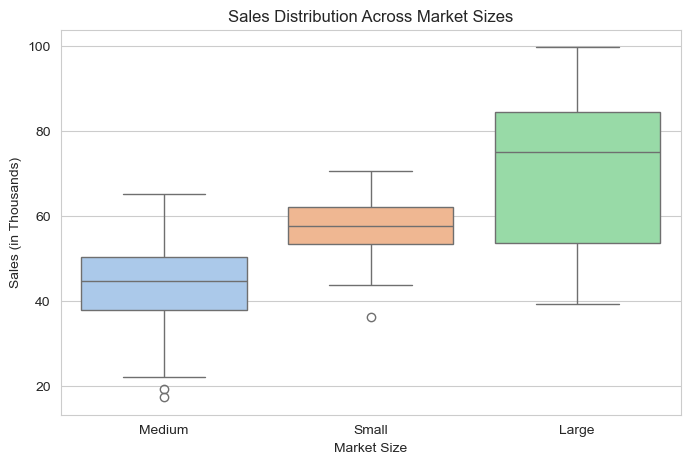

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="MarketSize", y="SalesInThousands", data=df, palette="pastel")

plt.title("Sales Distribution Across Market Sizes")
plt.xlabel("Market Size")
plt.ylabel("Sales (in Thousands)")
plt.show()

## ANOVA test

In [16]:
import scipy.stats as stats

# Perform ANOVA test
anova_result = stats.f_oneway(
    df[df["Promotion"] == 1]["SalesInThousands"],
    df[df["Promotion"] == 2]["SalesInThousands"],
    df[df["Promotion"] == 3]["SalesInThousands"]
)

# Print the ANOVA result
print("ANOVA Test Result:", anova_result)


ANOVA Test Result: F_onewayResult(statistic=21.953485793080677, pvalue=6.765849261408714e-10)


In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Running Tukey's HSD test
tukey_test = pairwise_tukeyhsd(df["SalesInThousands"], df["Promotion"])

# Print the results
print(tukey_test)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


## Futher anlysis required to check chamgin in different market size impact the sales